# GRIP-The Sparks Foundation
Data Science and Business Analyts Internship

Task-2.  prediciton the optimum number of clusters and represent it visually using unsurvised ML.

Author:- Prit Rameshbhai Sheta

Dataset= Iris dataset

# Step-1:- Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step-2:- Import the Iris dataset

In [2]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Step-3:- Data Exploring

In [3]:
#here print the first 5 row we used head function
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#here print the last 5 row we used tail function
iris.tail(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#we use shape functiobn for see the how many shapes in this data set
iris.shape

(150, 6)

In [6]:
#descirbe the iris dataset
iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#dropping unnecessary cloumn like: ID
iris.drop('Id', axis=1, inplace=True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#here agine we check null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#here, we check duplicate values
iris.duplicated().sum()

3

In [11]:
#we have 3 duplicate values so drop these 3 values
iris.drop_duplicates(inplace=True)

iris.shape[0] # 0 for row
iris.shape[1] # 1 for columns

5

In [12]:
#find the unique values
iris.Species.unique()          

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

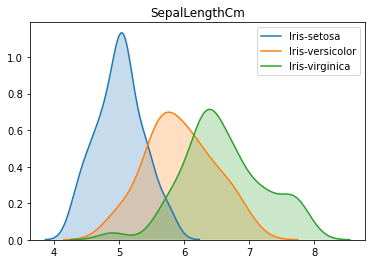

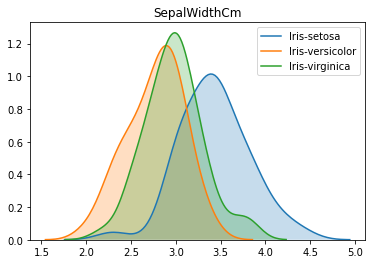

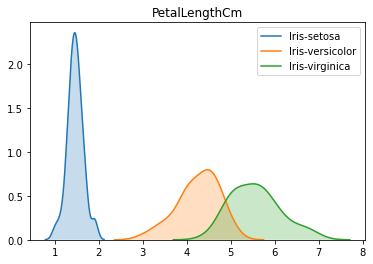

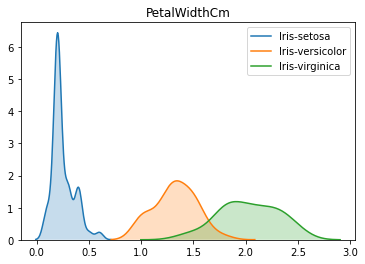

In [13]:
#distrubution of features by Species

for i in iris.columns[:-1]:
    
    sns.kdeplot(data = iris.loc[iris.Species=='Iris-setosa'][i], label= "Iris-setosa", shade=True)
    
    sns.kdeplot(data = iris.loc[iris.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)
    
    sns.kdeplot(data = iris.loc[iris.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)
    
    plt.title(i);
    
    plt.show()
    
    

In [14]:
#correlation matrics
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


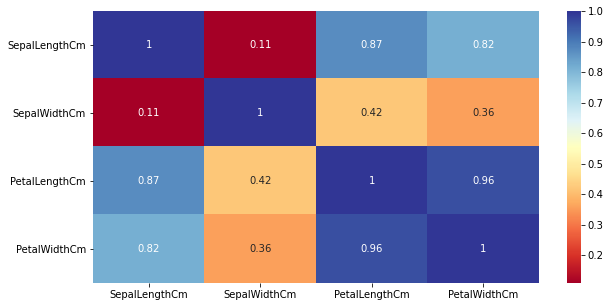

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris.corr()), cmap='RdYlBu', annot=True)

# Step-4:- use K-means clustring

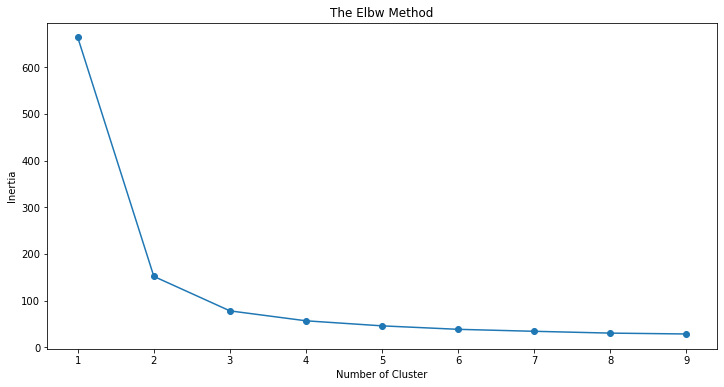

In [18]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++', random_state=2)
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    WCSS.append(kmeans.inertia_)
    
df = pd.DataFrame({'Cluster':range(1,10),'WCSS':WCSS})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['WCSS'], marker='o')
plt.title('The Elbw Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(iris.iloc[:,[0,1,2,3]])

print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2
 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1]


In [26]:
iris['cluster'] = kmeans.labels_
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


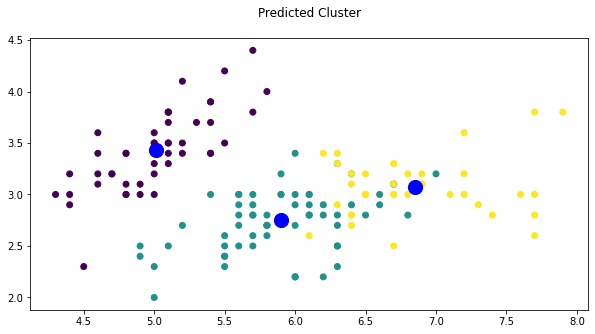

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c = iris.cluster)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, color = 'blue', label = 'Centroids')
plt.title('Predicted Cluster\n')
plt.show()